In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tqdm
import sklearn
import tensorflow as tf
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import itertools
import matplotlib
from joblib import dump


matplotlib.rcParams['font.family'] = 'Times New Roman'
matplotlib.rcParams['font.size'] = 16 

In [18]:
df = pd.read_csv('C:\\Users\\sshet\\Downloads\\Paper1_WebData_Final.csv')

In [19]:
df.columns

Index(['test_date', 'nid', 'L500k', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k',
       'R500k', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k', 'gender', 'naics',
       'age_group', 'region', 'NAICS_descr'],
      dtype='object')

In [20]:
L500 = np.array(df['L500k'])
L1k = np.array(df['L1k'])
L2k = np.array(df['L2k'])
L3k = np.array(df['L3k'])
L4k = np.array(df['L4k'])
L6k = np.array(df['L6k'])
L8k = np.array(df['L8k'])
R500 = np.array(df['R500k'])
R1k = np.array(df['R1k'])
R3k = np.array(df['R3k'])
R2k = np.array(df['R2k'])
R4k = np.array(df['R4k'])
R6k = np.array(df['R6k'])
R8k = np.array(df['R8k'])
gender = np.array(df['gender'])
ageGroup = np.array(df['age_group'])
industry = np.array(df['NAICS_descr'])
naics = np.array(df['naics'])

In [21]:
industry_counter = Counter(industry)
unique_industries = sorted(industry_counter)
industry_mapping = {industry: index + 1 for index, industry in enumerate(unique_industries)}

industry_numbers = [industry_mapping[industry_title] for industry_title in industry]

unique_gender = Counter(gender)
gender_mapping = {gender: index + 1 for index, gender in enumerate(unique_gender)}
gender_numbers = [gender_mapping[gender_title] for gender_title in gender]

femaleCount = np.count_nonzero(gender == 'F')
print(femaleCount)
maleCount = np.count_nonzero(gender == 'M')
print(maleCount)
print(femaleCount+maleCount)
print(len(gender))

247592
864130
1111722
1114966


In [22]:
data = pd.DataFrame({
    'L500': L500,
    'L1k': L1k,
    'L2k': L2k,
    'L3k': L3k,
    'L4k': L4k,
    'L6k': L6k,
    'L8k': L8k,
    'R500': R500,
    'R1k': R1k,
    'R2k': R2k,
    'R3k': R3k,
    'R4k': R4k,
    'R6k': R6k,
    'R8k': R8k,
    'Gender': gender_numbers,  # Assuming gender is already converted to numerical if needed
    'AgeGroup': ageGroup,
    'Industry': industry_numbers,  # Assuming you've already converted industry to numbers
})

print(f"Original DataFrame had {len(data)} rows.")

columns_to_replace = ['L500', 'L1k', 'L2k', 'L3k', 'L4k', 'L6k', 'L8k', 'R500', 'R1k', 'R3k', 'R4k', 'R6k', 'R8k']
data[columns_to_replace] = data[columns_to_replace].replace([998, 999], 100)

hearing_sum = data.loc[:, 'L500':'R8k'].sum(axis=1)

threshold_lower = 280
threshold_upper = 600

data_filtered = data[(hearing_sum >= threshold_lower)] #& (hearing_sum <= threshold_upper)]

unique_age_groups = [1, 2, 3, 4, 5]  # Replace with your actual unique age groups
unique_industries = unique_values = data_filtered['Industry'].unique()
unique_genders = [1, 2]  # Replace with your actual unique genders

filtered_data = pd.DataFrame()

combinations = list(itertools.product(unique_age_groups, unique_industries, unique_genders))

for combination in combinations:
    age, industry, gender = combination
    # Filter the data based on the current combination
    current_data = data_filtered[(data_filtered['AgeGroup'] == age) & 
                                 (data_filtered['Industry'] == industry) & 
                                 (data_filtered['Gender'] == gender)]

    # Check if there are at least 3 people in the current combination
    if len(current_data) >= 3:
        # Append the data to the filtered_data DataFrame
        filtered_data = pd.concat([filtered_data, current_data])


print(f"After filtering, DataFrame has {len(filtered_data)} rows.")

Original DataFrame had 1114966 rows.


KeyboardInterrupt: 

In [ ]:
data_filtered = filtered_data
number_to_industry = {number: industry for industry, number in industry_mapping.items()}

industry_titles = [number_to_industry[number] for number in data_filtered['Industry'].values]

print(industry_mapping)


In [ ]:
corr = data_filtered.corr()

plt.figure(figsize=(24, 20)) 
sns.heatmap(corr, annot=True, cmap="twilight", fmt=".2f", annot_kws={"size": 8})
plt.show()

In [ ]:
industry_hearing_avg = data_filtered.groupby('Industry')['R8k'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Industry', y='R8k', data=industry_hearing_avg.sort_values('R8k', ascending=False))
plt.xticks(rotation=45)
plt.xlabel('Industry')
plt.ylabel('Average R8k Value (dB)')
plt.title('Average Hearing Ability at 8000 Hz by Industry')
plt.show()

In [ ]:
specific_industry = 'Highway, Street, and Bridge Construction' 
data_specific_industry =  data_filtered[data_filtered['Industry'] == industry_mapping[specific_industry]]

frequency_columns = ['L8k', 'L6k', 'L4k', 'L3k', 'L2k', 'L1k', 'L500', 'R500', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k']
industry_hearing_avg = data_specific_industry[frequency_columns].mean().reset_index()

industry_hearing_avg.columns = ['Frequency', 'Average dB']

plt.figure(figsize=(14, 8))
sns.lineplot(x='Frequency', y='Average dB', data=industry_hearing_avg)
plt.xticks(rotation=45)
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.title(f'Average Hearing Ability Across Frequencies for {specific_industry}')
plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


In [ ]:
specific_industry_code = industry_mapping['Fiber Optic Cable Manufacturing']
specific_age_group = 1

data_specific = data_filtered[(data_filtered['Industry'] == specific_industry_code) & 
                              (data_filtered['AgeGroup'] == specific_age_group)]

frequency_columns = ['L8k', 'L6k', 'L4k', 'L3k', 'L2k', 'L1k', 'L500', 
                     'R500', 'R1k', 'R2k', 'R3k', 'R4k', 'R6k', 'R8k']
industry_age_hearing_avg = data_specific[frequency_columns].mean().reset_index()

industry_age_hearing_avg.columns = ['Frequency', 'Average dB']

plt.figure(figsize=(14, 8))
sns.lineplot(x='Frequency', y='Average dB', data=industry_age_hearing_avg, marker='o')  # Added marker for visibility
plt.xticks(rotation=45)
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.gca().invert_yaxis()  
plt.ylim(100, 0)
plt.title(f'Average Hearing Ability Across Frequencies for Industry Code {specific_industry_code} in Age Group {specific_age_group}')
plt.tight_layout()
plt.show()

In [40]:
df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2017-2018.xlsx')

R500 = np.array(df['AUXU500R']) #ytrain
R1000 = np.array(df['AUXU1K2R']) #ytrain
R2000 = np.array(df['AUXU2KR']) #xtrain
R3000 = np.array(df['AUXU3KR']) #ytrain
R4000 = np.array(df['AUXU4KR']) #xtrain
R6000 = np.array(df['AUXU6KR']) #ytrain
R8000 = np.array(df['AUXU8KR']) #ytrain
question1 = np.array(df['Q1']) #xtrain
question2 = np.array(df['Q2']) #xtrain
question3 = np.array(df['Q3']) #xtrain
genders = np.array(df['RIAGENDR']) #xtrain
ages = np.array(df['RIDAGEYR']) #xtrain
military = np.array(df['Military']) #xtrain

print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')


df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2015-2016.xlsx')

R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2011-2012.xlsx')

R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2009-2010.xlsx')

R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')


df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2007-2008.xlsx')

R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))

print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')


df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2005-2006.xlsx')


R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))

print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2003-2004.xlsx')


R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2001-2002.xlsx')


R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))
print('\n')

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_1999-2000.xlsx')


R500 = np.append(R500, np.array(df['AUXU500R']))
R1000 = np.append(R1000, np.array(df['AUXU1K2R']))
R2000 = np.append(R2000, np.array(df['AUXU2KR']))
R3000 = np.append(R3000, np.array(df['AUXU3KR']))
R4000 = np.append(R4000, np.array(df['AUXU4KR']))
R6000 = np.append(R6000, np.array(df['AUXU6KR']))
R8000 = np.append(R8000, np.array(df['AUXU8KR']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


print(len(R500))
print(len(R1000))
print(len(R2000))
print(len(R3000))
print(len(R4000))
print(len(R6000))
print(len(R8000))
print(len(question1))
print(len(question2))
print(len(question3))


In [41]:
X = np.column_stack((R2000, R4000, question1, question2, question3, genders, ages, military))
y = np.column_stack((R500, R1000, R3000, R6000, R8000))

scalerY = StandardScaler()
y = scalerY.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 


from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y.shape[1])  
])

model.compile(optimizer='adam',
              loss='mse', 
              metrics=['mse'])  

early_stopping = EarlyStopping(monitor='loss',  
                               min_delta=0.001, 
                               patience=10,
                               restore_best_weights=True)  

history = model.fit(X_scaled, y, epochs=100, batch_size=32, callbacks=[early_stopping])

loss_history = history.history['loss']

model.save('RightModel')
dump((scaler, scalerY), 'model_with_scaler.pkl')



# Extract the epoch numbers (starting from 1)
epochs = range(1, len(loss_history) + 1)

# Plotting the loss vs. epochs
plt.figure(figsize=(8, 5))
plt.plot(epochs, loss_history, 'bo-', label='Training Loss')
plt.title('Loss Function vs. Epoch Number')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()



1/1 [==============================] - 0s 123ms/step
Predicted values for R500, R1000, R3000, R6000, R8000 are: [30.298704 39.17371  81.11961  94.70306  95.14287 ]


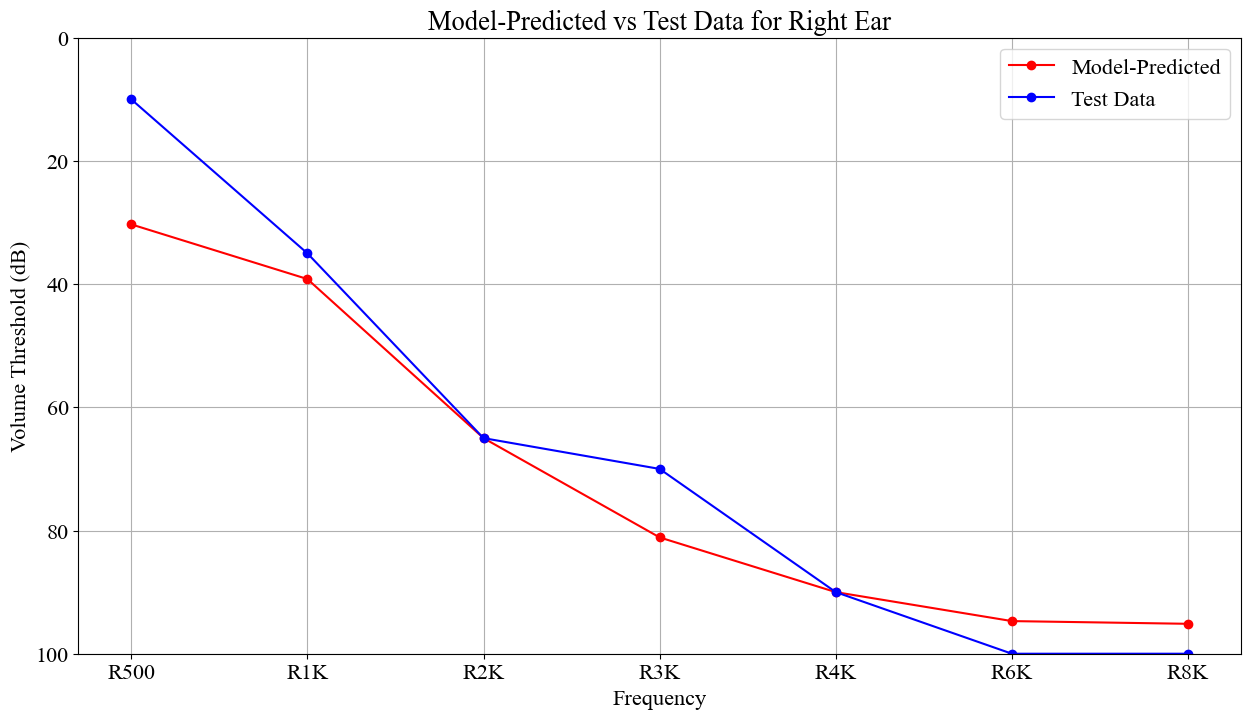

In [13]:
# New data for prediction
r2000Test = 65
r4000Test = 90
question1 = 2
question2 = 2
question3 = 2
gender = 1
age = 5
military = 2

# Create a 2D array for the new data
new_data = np.array([[r2000Test, r4000Test, question1, question2, question3, gender, age, military]])

# Use the actual 'scaler' to transform the new data
new_data_scaled = scaler.transform(new_data)

# Use the trained model to make predictions on the scaled new data
predictions = model.predict(new_data_scaled)
predictions = scalerY.inverse_transform(predictions)

# Print the predicted values
print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", predictions.flatten())
R500, R1000, R3000, R6000, R8000 = predictions.flatten()

values = {
    "R500": R500, 
    "R1K": R1000,   
    "R2K": r2000Test, 
    "R3K": R3000,   
    "R4K": r4000Test,  
    "R6K": R6000,
    "R8K": R8000,   
}

frequencies = list(values.keys())
db_levels = list(values.values())

# Plotting the graph
plt.figure(figsize=(15, 8))
plt.plot(frequencies, db_levels, marker='o', color = 'red', label = 'Model-Predicted')
plt.title('DNN 2k and 4k')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.grid(True)
plt.ylim(100, 0)

values = {
    "R500": 10, 
    "R1K": 35,   
    "R2K": 65, 
    "R3K": 70,   
    "R4K": 90,  
    "R6K": 100,
    "R8K": 100, 
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.plot(frequencies, db_levels, marker='o', color = 'blue', label = 'Test Data')
plt.title('Model-Predicted vs Test Data for Right Ear')
plt.xlabel('Frequency')
plt.ylabel('Volume Threshold (dB)')
plt.grid(True)
plt.ylim(100, 0)
plt.legend()
plt.show()



In [42]:
df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2017-2018.xlsx')

L500 = np.array(df['AUXU500L']) #ytrain
L1000 = np.array(df['AUXU1K2L']) #ytrain
L2000 = np.array(df['AUXU2KL']) #xtrain
L3000 = np.array(df['AUXU3KL']) #ytrain
L4000 = np.array(df['AUXU4KL']) #xtrain
L6000 = np.array(df['AUXU6KL']) #ytrain
L8000 = np.array(df['AUXU8KL']) #ytrain
question1 = np.array(df['Q1']) #xtrain
question2 = np.array(df['Q2']) #xtrain
question3 = np.array(df['Q3']) #xtrain
genders = np.array(df['RIAGENDR']) #xtrain
ages = np.array(df['RIDAGEYR']) #xtrain
military = np.array(df['Military']) #xtrain

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2015-2016.xlsx')

L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2011-2012.xlsx')

L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2009-2010.xlsx')

L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2007-2008.xlsx')

L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2005-2006.xlsx')


L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))


df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2003-2004.xlsx')


L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_2001-2002.xlsx')


L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))

df = pd.read_excel('C:\\Users\\sshet\\Downloads\\NHANES_1999-2000.xlsx')


L500 = np.append(L500, np.array(df['AUXU500L']))
L1000 = np.append(L1000, np.array(df['AUXU1K2L']))
L2000 = np.append(L2000, np.array(df['AUXU2KL']))
L3000 = np.append(L3000, np.array(df['AUXU3KL']))
L4000 = np.append(L4000, np.array(df['AUXU4KL']))
L6000 = np.append(L6000, np.array(df['AUXU6KL']))
L8000 = np.append(L8000, np.array(df['AUXU8KL']))
question1 = np.append(question1, np.array(df['Q1']))
question2 = np.append(question2, np.array(df['Q2']))
question3 = np.append(question3, np.array(df['Q3']))
genders = np.append(genders, np.array(df['RIAGENDR']))
ages = np.append(ages, np.array(df['RIDAGEYR']))
military = np.append(military, np.array(df['Military']))



In [43]:
X = np.column_stack((L2000, L4000, question1, question2, question3, genders, ages, military))
y = np.column_stack((L500, L1000, L3000, L6000, L8000))

scalerY = StandardScaler()
y = scalerY.fit_transform(y)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

from tensorflow.keras.callbacks import EarlyStopping

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_scaled.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(y.shape[1])  
])

model.compile(optimizer='adam',
              loss='mse', 
              metrics=['mse'])  

model.save('LeftModel')
dump((scaler, scalerY), 'model_with_scalerLeft.pkl')


early_stopping = EarlyStopping(monitor='loss',  
                               min_delta=0.001, 
                               patience=10,
                               restore_best_weights=True)  

history = model.fit(X_scaled, y, epochs=100, batch_size=32, callbacks=[early_stopping])



1/1 [==============================] - 0s 72ms/step
Predicted values for R500, R1000, R3000, R6000, R8000 are: [18.845377 20.696085 48.409313 61.02252  66.42299 ]


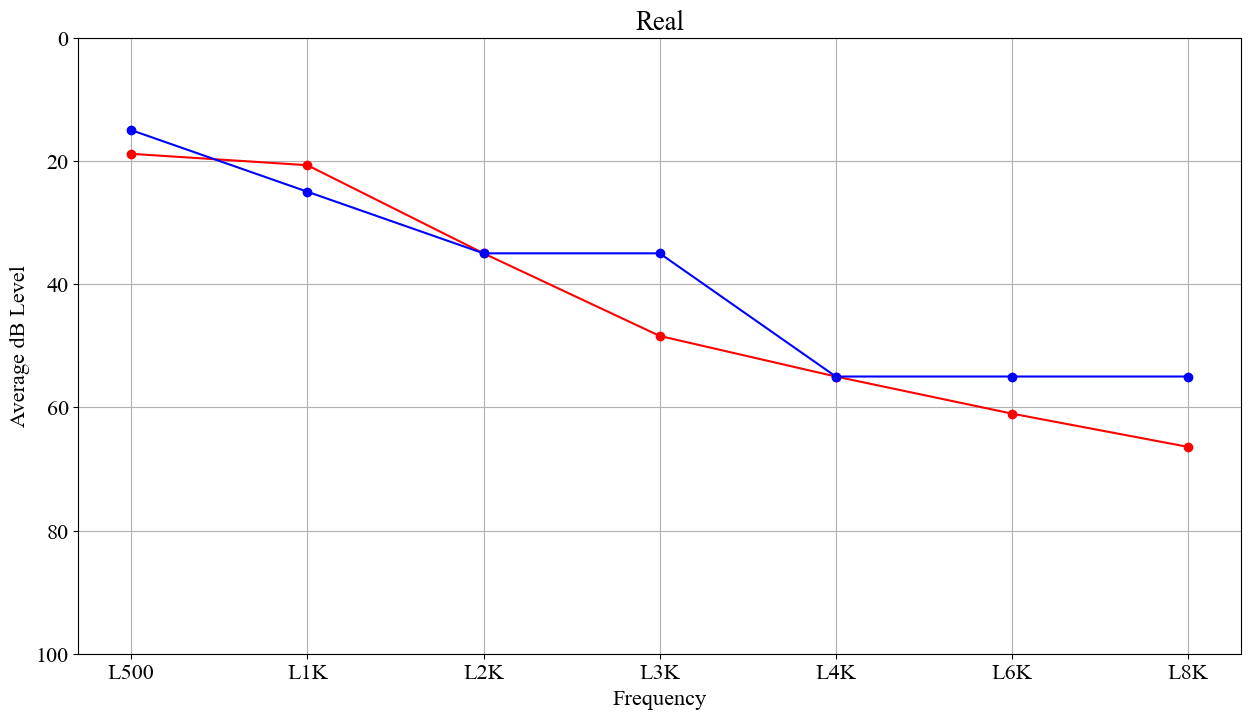

In [433]:
l2000Test = 35
l4000Test = 55
question1 = 2
question2 = 2
question3 = 2
gender = 1
age = 5
military = 2


# Create a 2D array for the new data
new_data = np.array([[l2000Test, l4000Test, question1, question2, question3, gender, age, military]])

# Use the actual 'scaler' to transform the new data
new_data_scaled = scaler.transform(new_data)

# Use the trained model to make predictions on the scaled new data
predictions = model.predict(new_data_scaled)
predictions = scalerY.inverse_transform(predictions)

# Print the predicted values
print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", predictions.flatten())
L500, L1000, L3000, L6000, L8000 = predictions.flatten()

values = {
    "L500": L500, 
    "L1K": L1000,   
    "L2K": l2000Test, 
    "L3K": L3000,   
    "L4K": l4000Test,  
    "L6K": L6000,
    "L8K": L8000,   
}

frequencies = list(values.keys())
db_levels = list(values.values())

# Plotting the graph
plt.figure(figsize=(15, 8))
plt.plot(frequencies, db_levels, marker='o', color = 'red')
plt.title('DNN 2k and 4k')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.grid(True)
plt.ylim(100, 0)

values = {
    "L500": 15, 
    "L1K": 25,   
    "L2K": 35, 
    "L3K": 35,   
    "L4K": 55,  
    "L6K": 55,
    "L8K": 55, 
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.plot(frequencies, db_levels, marker='o', color = 'blue')
plt.title('Real')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.grid(True)
plt.ylim(100, 0)
plt.show()



Predicted values for R500, R1000, R3000, R6000, R8000 are: 15.663703703703714 17.974814814814817 47.048888888888904 54.57333333333334 80.45407407407403


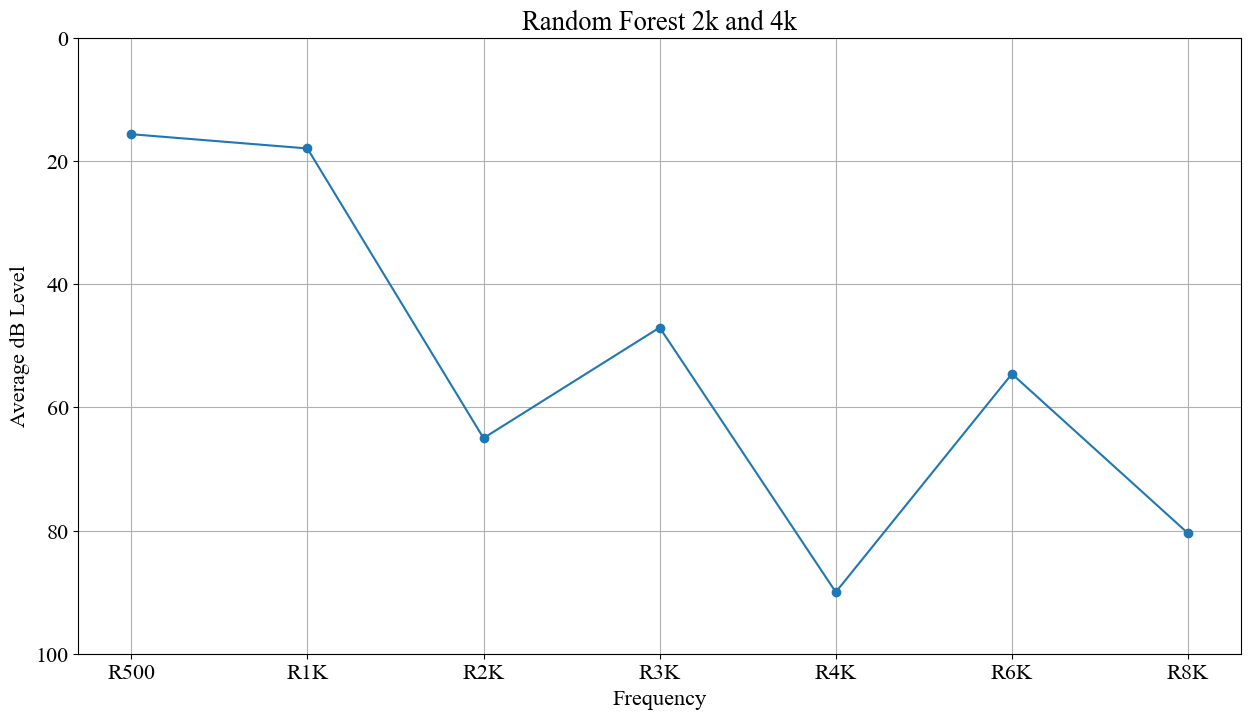

In [446]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

forest_model = RandomForestRegressor(n_estimators=225, random_state=42)
forest_model.fit(X_scaled, y)

new_data_scaled = scaler.transform(new_data)

predictions_scaled = forest_model.predict(new_data_scaled)

predictions = scalerY.inverse_transform(predictions_scaled)

R500, R1000, R3000, R6000, R8000 = predictions[0]

print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", R500, R1000, R3000, R6000, R8000)

values = {
    "R500": R500,
    "R1K": R1000,
    "R2K": r2000Test,
    "R3K": R3000,
    "R4K": r4000Test,
    "R6K": R6000,
    "R8K": R8000,
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.figure(figsize=(15, 8))
plt.plot(frequencies, db_levels, marker='o')
plt.title('Random Forest 2k and 4k')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.grid(True)
plt.ylim(100, 0)
plt.show()

Predicted values for R500, R1000, R3000, R6000, R8000 are: [15.6637037  17.97481481 47.04888889 54.57333333 80.45407407]


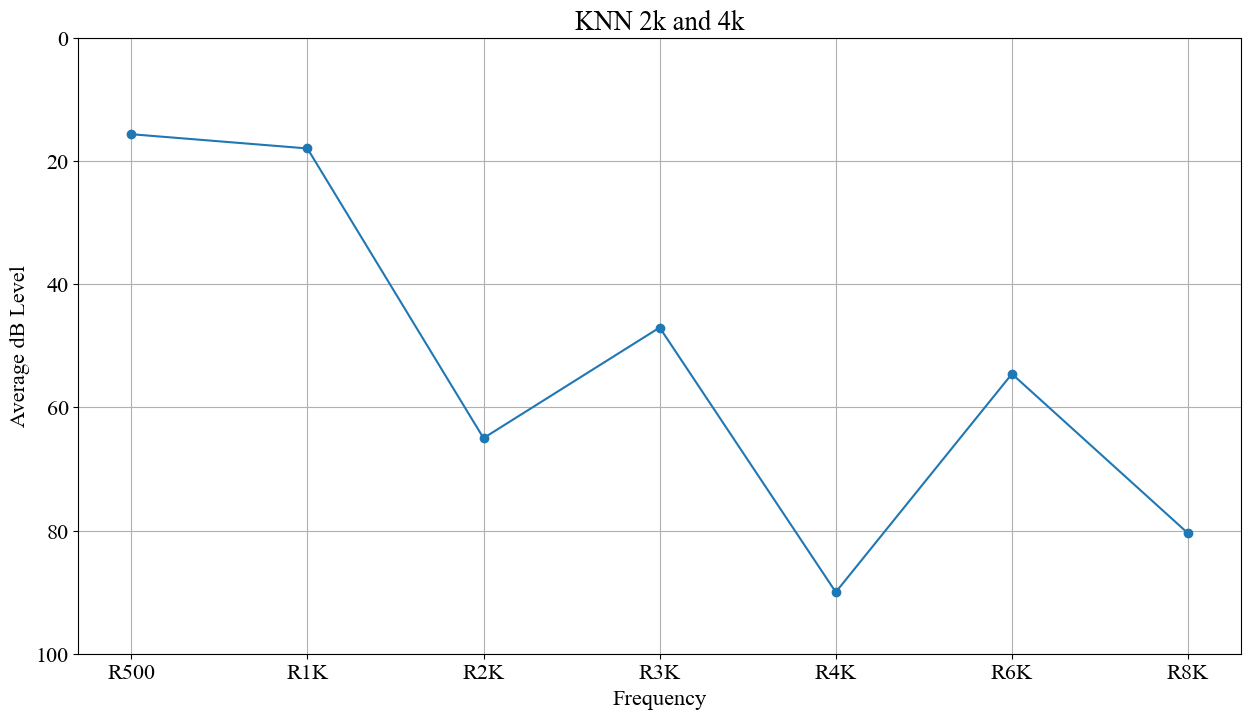

In [447]:
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) based on your dataset

knn_model.fit(X_scaled, y)

new_data_scaled = scaler.transform(new_data)

predictions_scaled = forest_model.predict(new_data_scaled)

predictions = scalerY.inverse_transform(predictions_scaled)

R500, R1000, R3000, R6000, R8000 = predictions[0]


print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", predictions.flatten())
R500, R1000, R3000, R6000, R8000 = predictions.flatten()

values = {
    "R500": R500,
    "R1K": R1000,
    "R2K": r2000Test,
    "R3K": R3000,
    "R4K": r4000Test,
    "R6K": R6000,
    "R8K": R8000,
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.figure(figsize=(15, 8))
plt.plot(frequencies, db_levels, marker='o')
plt.title('KNN 2k and 4k')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.grid(True)
plt.ylim(100, 0)
plt.show()

Predicted values for R500, R1000, R3000, R6000, R8000 are: [15.6637037  17.97481481 47.04888889 54.57333333 80.45407407]


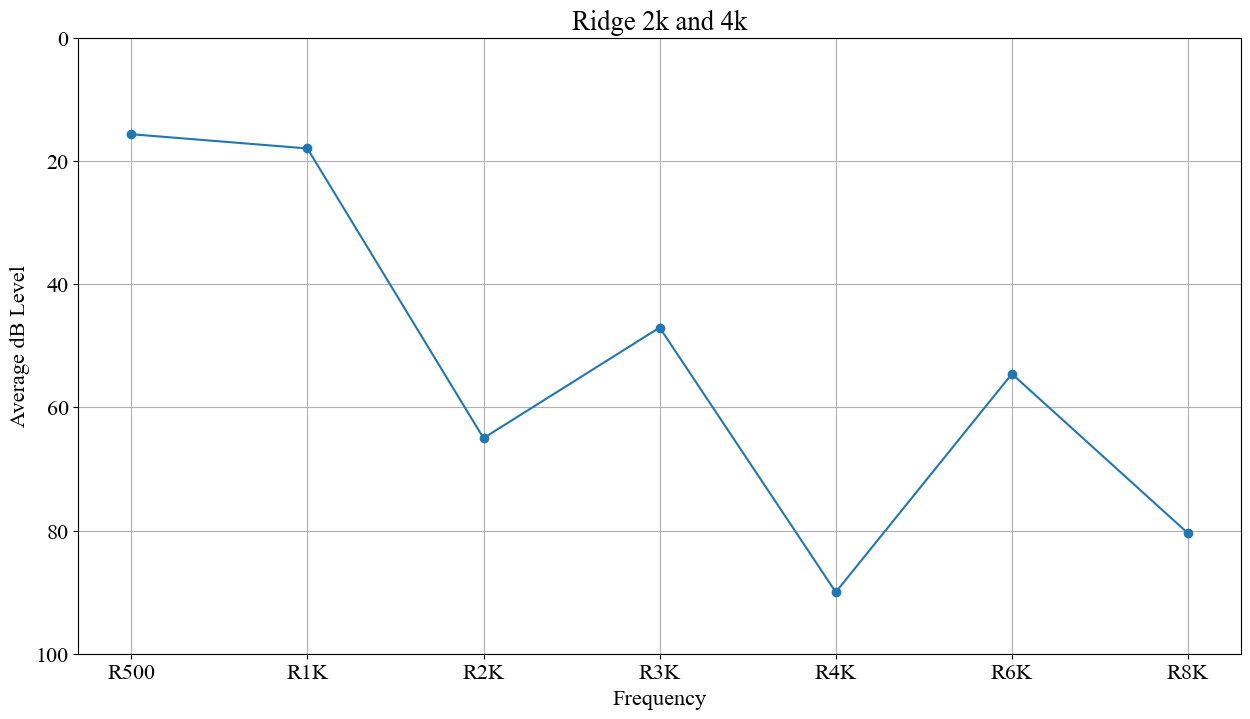

In [448]:
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

ridge_model = Ridge(alpha=1.0)  # You can adjust the regularization strength (alpha)

ridge_model.fit(X_scaled, y)

new_data_scaled = scaler.transform(new_data)

predictions_scaled = forest_model.predict(new_data_scaled)

predictions = scalerY.inverse_transform(predictions_scaled)

R500, R1000, R3000, R6000, R8000 = predictions[0]

# # new_data_scaled = scaler.transform(np.array([[r2000Test, r4000Test, conditionCheckTest, conditionBeginTest]]))
# new_data_scaled = scaler.transform(np.array([[r2000Test, r4000Test, question1, question2, question3, gender, age, military]]))

# predictions = ridge_model.predict(new_data_scaled)

print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", predictions.flatten())
R500, R1000, R3000, R6000, R8000 = predictions.flatten()

values = {
    "R500": R500,
    "R1K": R1000,
    "R2K": r2000Test,
    "R3K": R3000,
    "R4K": r4000Test,
    "R6K": R6000,
    "R8K": R8000,
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.figure(figsize=(15, 8))
plt.plot(frequencies, db_levels, marker='o')
plt.title('Ridge 2k and 4k')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.ylim(100, 0)
plt.grid(True)
plt.show()

Predicted values for R500, R1000, R3000, R6000, R8000 are: [15.6637037  17.97481481 47.04888889 54.57333333 80.45407407]


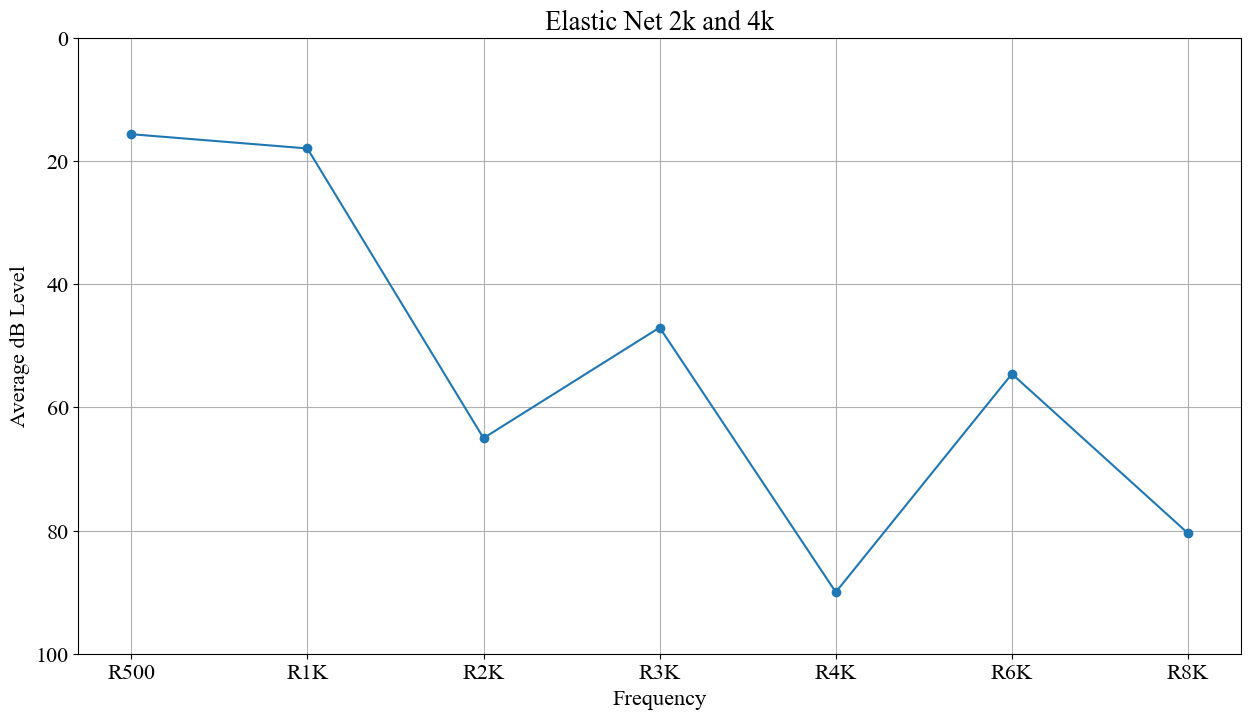

In [449]:
from sklearn.linear_model import ElasticNet
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np

elasticnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5)  # You can adjust alpha and l1_ratio

elasticnet_model.fit(X_scaled, y)

# new_data_scaled = scaler.transform(np.array([[r2000Test, r4000Test, conditionCheckTest, conditionBeginTest]]))
# predictions = elasticnet_model.predict(new_data_scaled)

new_data_scaled = scaler.transform(new_data)

predictions_scaled = forest_model.predict(new_data_scaled)

predictions = scalerY.inverse_transform(predictions_scaled)

R500, R1000, R3000, R6000, R8000 = predictions[0]


print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", predictions.flatten())
R500, R1000, R3000, R6000, R8000 = predictions.flatten()

values = {
    "R500": R500,
    "R1K": R1000,
    "R2K": r2000Test,
    "R3K": R3000,
    "R4K": r4000Test,
    "R6K": R6000,
    "R8K": R8000,
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.figure(figsize=(15, 8))
plt.plot(frequencies, db_levels, marker='o')
plt.title('Elastic Net 2k and 4k')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.ylim(100, 0)
plt.grid(True)
plt.show()

In [399]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


new_data_scaled = scaler.transform(np.array([[r2000Test, r4000Test, question1, question2, question3, gender, age, military]]))

svr_model.fit(X_train_scaled, y_train.ravel())

predictions = svr_model.predict(new_data_scaled)


ValueError: Found input variables with inconsistent numbers of samples: [5136, 25680]

1/1 [==============================] - 0s 86ms/step
Predicted values for R500, R1000, R3000, R6000, R8000 are: [34.13152 38.8579  78.25866 97.00552 97.32443]
1/1 [==============================] - 0s 66ms/step
Predicted values for R500, R1000, R3000, R6000, R8000 are: [18.845377 20.696085 48.409313 61.02252  66.42299 ]


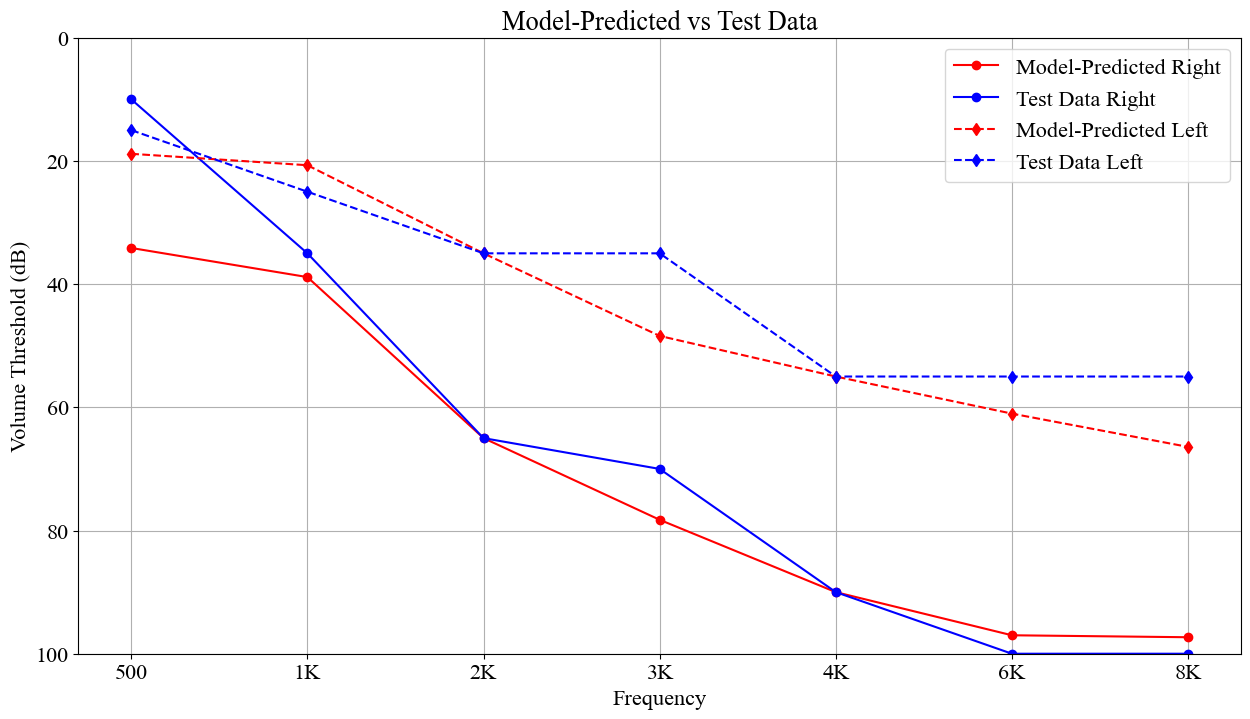

In [444]:
# New data for prediction
r2000Test = 65
r4000Test = 90
question1 = 2
question2 = 2
question3 = 2
gender = 1
age = 5
military = 2

# Create a 2D array for the new data
new_data = np.array([[r2000Test, r4000Test, question1, question2, question3, gender, age, military]])

# Use the actual 'scaler' to transform the new data
new_data_scaled = scaler.transform(new_data)

# Use the trained model to make predictions on the scaled new data
predictions = model.predict(new_data_scaled)
predictions = scalerY.inverse_transform(predictions)

# Print the predicted values
print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", predictions.flatten())
R500, R1000, R3000, R6000, R8000 = predictions.flatten()

values = {
    "500": R500, 
    "1K": R1000,   
    "2K": r2000Test, 
    "3K": R3000,   
    "4K": r4000Test,  
    "6K": R6000,
    "8K": R8000,   
}

frequencies = list(values.keys())
db_levels = list(values.values())

# Plotting the graph
plt.figure(figsize=(15, 8))

plt.plot(frequencies, db_levels, marker='o', color = 'red', label = 'Model-Predicted Right')
plt.title('DNN 2k and 4k')
plt.xlabel('Frequency')
plt.ylabel('Average dB Level')
plt.grid(True)
plt.ylim(100, 0)

values = {
    "500": 10, 
    "1K": 35,   
    "2K": 65, 
    "3K": 70,   
    "4K": 90,  
    "6K": 100,
    "8K": 100, 
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.plot(frequencies, db_levels, marker='o', color = 'blue', label = 'Test Data Right')
plt.title('Model-Predicted vs Test Data for Right Ear')
plt.xlabel('Frequency')
plt.ylabel('Volume Threshold (dB)')
plt.grid(True)
plt.ylim(100, 0)
plt.legend()



l2000Test = 35
l4000Test = 55
question1 = 2
question2 = 2
question3 = 2
gender = 1
age = 5
military = 2


# Create a 2D array for the new data
new_data = np.array([[l2000Test, l4000Test, question1, question2, question3, gender, age, military]])

# Use the actual 'scaler' to transform the new data
new_data_scaled = scaler.transform(new_data)

# Use the trained model to make predictions on the scaled new data
predictions = model.predict(new_data_scaled)
predictions = scalerY.inverse_transform(predictions)

# Print the predicted values
print("Predicted values for R500, R1000, R3000, R6000, R8000 are:", predictions.flatten())
L500, L1000, L3000, L6000, L8000 = predictions.flatten()

values = {
    "500": L500, 
    "1K": L1000,   
    "2K": l2000Test, 
    "3K": L3000,   
    "4K": l4000Test,  
    "6K": L6000,
    "8K": L8000,   
}

frequencies = list(values.keys())
db_levels = list(values.values())

# Plotting the graph
plt.plot(frequencies, db_levels, marker='d', linestyle='dashed', color = 'red', label = 'Model-Predicted Left')
plt.title('DNN 2k and 4k')
plt.xlabel('Frequency')
plt.grid(True)
plt.ylim(100, 0)

values = {
    "500": 15, 
    "1K": 25,   
    "2K": 35, 
    "3K": 35,   
    "4K": 55,  
    "6K": 55,
    "8K": 55, 
}

frequencies = list(values.keys())
db_levels = list(values.values())

plt.plot(frequencies, db_levels, marker='d', linestyle='dashed', color = 'blue', label = 'Test Data Left')
plt.title('Model-Predicted vs Test Data')
plt.xlabel('Frequency')
plt.grid(True)
plt.ylim(100, 0)
plt.legend()
plt.show()

